In [1]:
import sys
sys.path.append('../src/')
sys.path.append('../gtm/')

import importlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

from sim_utils import *
from simulation import *
from datetime import datetime

/Users/shim-kojio/Desktop/internship/codes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### dirichlet X mlp

In [2]:
num_topics = 20
num_simulations = 5
doc_args = {
    "min_words": 50,
    "max_words": 100,
    "num_docs": 5000,
    "voc_size": 1000,
    "num_content_covs": 2,
    "num_prev_covs": 2,
    }
model_type = "gtm"
gtm_model_args = {
    "n_topics": num_topics,
    "num_epochs": 10,
    "update_prior": True,
    "doc_topic_prior": "dirichlet",
    "decoder_type": "mlp"
    }
matching_by = "dot_product"

score_dict = {"cossim":[], "correlation":[],"keywords":[],"euclid":[]}
for i in range(num_simulations):

    s = Simulator(model_type=model_type,num_topics=num_topics)
    s.generate_docs(
        is_output=True,
        seed=i,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"],
        doc_args=doc_args
        )
    s.estimate_distributions(
        is_output=True,
        model_args=gtm_model_args
        )
    corres_num_topic_dict = matching_topic(
        model_type=model_type,
        matching_by=matching_by,
        doc_topic_prior=gtm_model_args["doc_topic_prior"],
        decoder_type=gtm_model_args["decoder_type"]
        )
    for score_type in score_dict.keys():
        score = calculate_score(
            model_type=model_type,
            score_type=score_type,
            corres_num_topic_dict=corres_num_topic_dict,
            doc_topic_prior=gtm_model_args["doc_topic_prior"],
            decoder_type=gtm_model_args["decoder_type"],
            )
        score_dict[score_type].append(score)

    print("date:{}".format(datetime.now()))
    print("finished {}th work".format(i+1))
    print("  ")
with open("../data/{}/score_dict_{}_{}_{}.pickle".format(model_type,num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]),"wb") as f:
    pickle.dump(score_dict,f)

100%|██████████| 5000/5000 [01:12<00:00, 69.23it/s]


Epoch   1	Iter   10	Loss:2.7267880	Rec Loss:2.0130992	MMD:0.7136889	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.7788710	Rec Loss:3.7533444	MMD:1.0255266	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0673656	Rec Loss:1.9732950	MMD:0.0940708	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7291143	Rec Loss:3.6605029	MMD:0.0686114	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:2.0088401	Rec Loss:1.9924499	MMD:0.0163901	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6870106	Rec Loss:3.6631539	MMD:0.0238566	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9856657	Rec Loss:1.9418354	MMD:0.0438303	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.8175902	Rec Loss:3.7780609	MMD:0.0395293	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9916484	Rec Loss:1.9556854	MMD:0.0359630	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 5000/5000 [02:07<00:00, 39.07it/s]


Epoch   1	Iter   10	Loss:2.6120982	Rec Loss:1.9574186	MMD:0.6546797	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.7246103	Rec Loss:3.7777333	MMD:0.9468771	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0345631	Rec Loss:1.9684718	MMD:0.0660913	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.6692554	Rec Loss:3.6170562	MMD:0.0521992	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9546322	Rec Loss:1.9391772	MMD:0.0154550	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.7316331	Rec Loss:3.6796601	MMD:0.0519730	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9649527	Rec Loss:1.9401150	MMD:0.0248377	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.7647822	Rec Loss:3.6837470	MMD:0.0810351	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9938265	Rec Loss:1.9618183	MMD:0.0320082	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 5000/5000 [02:11<00:00, 37.92it/s]


Epoch   1	Iter   10	Loss:2.7703326	Rec Loss:1.9739907	MMD:0.7963420	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.6654107	Rec Loss:3.6494841	MMD:1.0159264	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9927685	Rec Loss:1.9324164	MMD:0.0603520	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8080875	Rec Loss:3.6626708	MMD:0.1454169	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9956806	Rec Loss:1.9532616	MMD:0.0424190	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6514367	Rec Loss:3.5985103	MMD:0.0529265	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9988679	Rec Loss:1.9723804	MMD:0.0264874	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.8394789	Rec Loss:3.7884409	MMD:0.0510380	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:2.0223827	Rec Loss:1.9472156	MMD:0.0751673	Sparsity_Loss:0.0000000	Pred_Loss:0.

100%|██████████| 5000/5000 [02:13<00:00, 37.51it/s]


Epoch   1	Iter   10	Loss:2.6464200	Rec Loss:1.9567919	MMD:0.6896281	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.4770068	Rec Loss:3.6022969	MMD:0.8747098	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:1.9568865	Rec Loss:1.9201750	MMD:0.0367116	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.7154734	Rec Loss:3.6467400	MMD:0.0687335	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9753366	Rec Loss:1.9500431	MMD:0.0252935	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.8172388	Rec Loss:3.7838229	MMD:0.0334159	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9827332	Rec Loss:1.9409347	MMD:0.0417986	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.6081597	Rec Loss:3.6128910	MMD:-0.0047314	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:2.0110400	Rec Loss:2.0016317	MMD:0.0094083	Sparsity_Loss:0.0000000	Pred_Loss:0

100%|██████████| 5000/5000 [02:13<00:00, 37.50it/s]


Epoch   1	Iter   10	Loss:2.8458543	Rec Loss:1.9696569	MMD:0.8761973	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   1	Iter   20	Loss:4.7422992	Rec Loss:3.7112970	MMD:1.0310024	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   10	Loss:2.0015996	Rec Loss:1.9366143	MMD:0.0649852	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   2	Iter   20	Loss:3.8642219	Rec Loss:3.7407671	MMD:0.1234548	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   10	Loss:1.9894955	Rec Loss:1.9550405	MMD:0.0344551	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   3	Iter   20	Loss:3.6428182	Rec Loss:3.6141463	MMD:0.0286719	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   10	Loss:1.9899069	Rec Loss:1.9632442	MMD:0.0266627	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   4	Iter   20	Loss:3.5333782	Rec Loss:3.5303040	MMD:0.0030741	Sparsity_Loss:0.0000000	Pred_Loss:0.0000000
Epoch   5	Iter   10	Loss:1.9297756	Rec Loss:1.9261765	MMD:0.0035991	Sparsity_Loss:0.0000000	Pred_Loss:0.

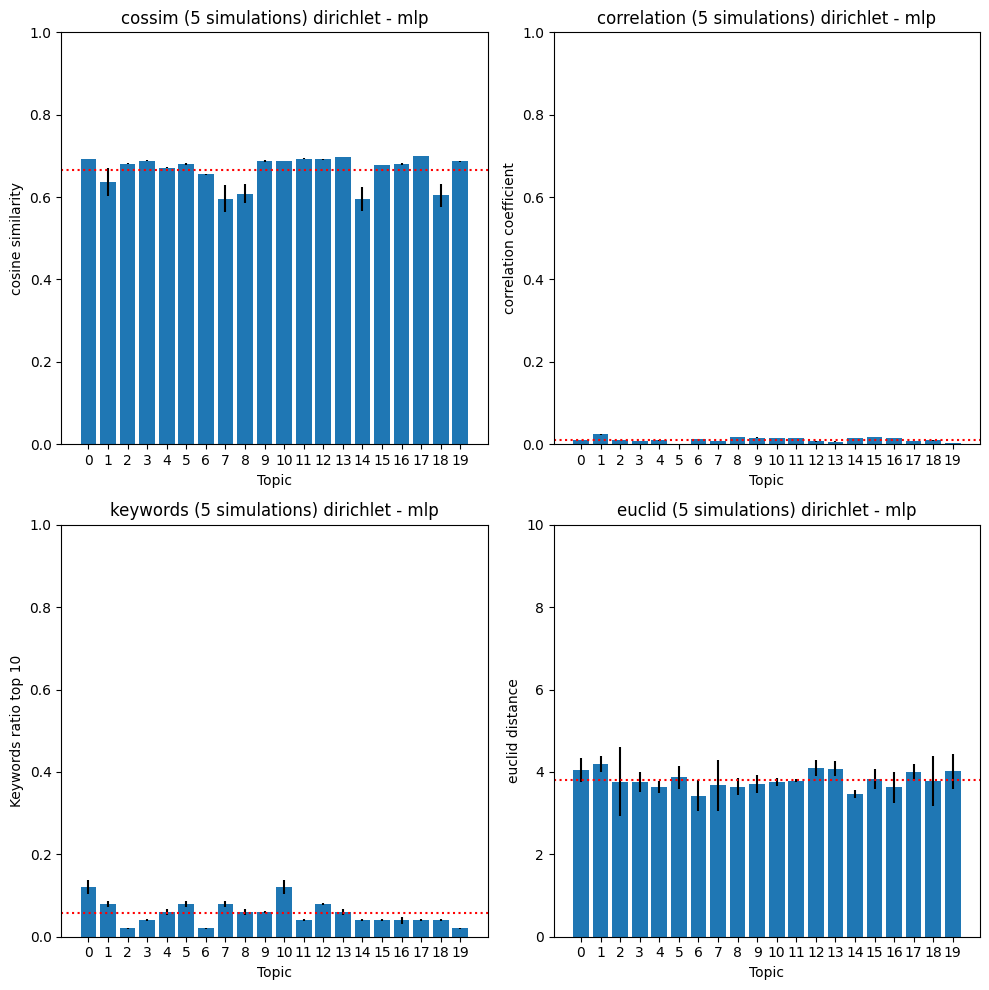

In [33]:
fig = plt.figure(figsize=(10,10),facecolor="white", tight_layout=True)
ax1 = fig.add_subplot(2, 2, 1,xlabel="Topic", ylabel="cosine similarity")
ax2 = fig.add_subplot(2, 2, 2, xlabel="Topic", ylabel="correlation coefficient")
ax3 = fig.add_subplot(2, 2, 3, xlabel="Topic", ylabel="Keywords ratio top 10")
ax4 = fig.add_subplot(2, 2, 4, xlabel="Topic", ylabel="euclid distance")
score_type_list = ["cossim","correlation","keywords", "euclid"]
ax_list = [ax1,ax2,ax3,ax4]
for i,score_type in enumerate(score_type_list):
    df_score_res = pd.DataFrame(score_dict[score_type],columns=["Topic{}".format(i) for i in range(num_topics)])
    x = np.arange(num_topics)
    mean = df_score_res.mean()
    var = df_score_res.var()
    ax_list[i].bar(x, mean, yerr=var)
    ax_list[i].axhline(mean.mean(), color='r', linestyle='dotted')
    if i ==3:
        ax_list[i].set_ylim(0, 10)
    else:
        ax_list[i].set_ylim(0, 1)
    ax_list[i].set_xticks(range(num_topics))
    ax_list[i].set_title("{} ({} simulations) {} - {}".format(score_type_list[i],num_simulations,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
    # plt.savefig("../fig/{}_{}_{}_{}.png".format(model_type,score_type,gtm_model_args["doc_topic_prior"],gtm_model_args["decoder_type"]))
plt.subplots_adjust(hspace=0.4)
plt.show()